<a href="https://colab.research.google.com/github/rbarbanell/HW3-4/blob/master/Copy_of_Applied_Homework__2_Markov_chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import linalg
import sympy as sp



#Markov chains
Rebecca Barbanell

1.) Use Python to complete problem 5.1: T2. Report your calculations from Python and
explain what they mean.

T2.) Each night a gaurd patrols an art gallery with seven rooms connected by corridor, as shown in the accompanying figure. The gaurd spends 10 mins in a room and then moves to a neighboring room that is chosen at random. Eache posible choice being equally liked.


a) find the 7x7 transition matrix for the surveillance pattern.
b)Assuming that the guard(or a replacement) follows the surveillance pattern indefinitly, what proportions of time does the gaurd spend in each room

b) Assuming that the guard(or a repacement) follows the surveillance pattern indefinitely, what proportion of time does the guard spend in each room?

In [ ]:
T = np.array([
[0, 1/3, 0, 1/3, 0, 0, 0],
[1/2, 0, 1/2, 0, 1/4, 0, 0],
[0, 1/3, 0, 0, 0, 1/3, 0],
[1/2, 0 , 0, 0, 1/4, 0, 1/3],
[0, 1/3, 0, 1/3, 0, 1/3, 1/3],
[0, 0, 1/2, 0, 1/4, 0 , 1/3],
[0 , 0, 0, 1/3, 1/4, 1/3, 0]])

# we are assuming that the gaurd is starting in room 1. 

x0 = np.array([[1],[0],[0],[0],[0],[0],[0]])

# Calculating the probability after 5 steps
T_5 = np.linalg.matrix_power(T,5)
Pv_5 = np.matmul(T_5,x0) 

# Calculating the probability after 10 steps
T_10 = np.linalg.matrix_power(T,10)
Pv_10 = np.matmul(T_10,x0) 

# Calculating the probability after 20 steps
T_20 = np.linalg.matrix_power(T,20)
Pv_20 = np.matmul(T_20,x0) 

# Calculating the probability after 100 steps
T_100 = np.linalg.matrix_power(T,100)
Pv_100 = np.matmul(T_100,x0) 




print("after 5 steps: \n")

print(Pv_5)
print("making sure the probabilties are adding up to one: \n")

print(np.sum(Pv_5))

print("after 10 steps: \n")

print(Pv_10)
print("making sure the probabilties are adding up to one: \n")

print(np.sum(Pv_10))

print("after 20 steps: \n")

print(Pv_20)
print("making sure the probabilties are adding up to one: \n")

print(np.sum(Pv_20))

print("after 100 steps: \n")

print(Pv_100)
print("making sure the probabilties are adding up to one: \n")

print(np.sum(Pv_100))



after 5 steps: 

[[0.01851852]
 [0.27777778]
 [0.01851852]
 [0.24845679]
 [0.09567901]
 [0.2345679 ]
 [0.10648148]]
making sure the probabilties are adding up to one: 

0.9999999999999999
after 10 steps: 

[[0.14209756]
 [0.08700798]
 [0.14196896]
 [0.1030164 ]
 [0.25192107]
 [0.1030164 ]
 [0.17097162]]
making sure the probabilties are adding up to one: 

0.9999999999999999
after 20 steps: 

[[0.11076331]
 [0.13385505]
 [0.11076329]
 [0.13796626]
 [0.21330417]
 [0.13796626]
 [0.15538165]]
making sure the probabilties are adding up to one: 

0.9999999999999994
after 100 steps: 

[[0.1000002 ]
 [0.1499997 ]
 [0.1000002 ]
 [0.14999978]
 [0.20000025]
 [0.14999978]
 [0.1500001 ]]
making sure the probabilties are adding up to one: 

0.9999999999999974


From the program above T^n * x0 gives us the state of system after n steps. So as n grows higher and approaches infinity the system stabilizes and corresponds to the probability that the gaurd is in a particular room at a given time. 

Room 1 = 10%

Room 2 = 15%

Room 3 = 10%

Room 4 = 15%

Room 5 = 20%

Room 6 = 15% 

Room 7 = 15%

--------------

total:  100%

2) Open the Python notebook Markov chain predictive text in the Wise resources folder. Use your own text file of at least 100 words to generate some lines of predictive text. Share your favorites, and then explain how the code works.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ch_1_Frankenstein.txt to ch_1_Frankenstein.txt


In [ ]:
textfile=open('ch_1_Frankenstein.txt', 'r')
text=textfile.read()
text = text.replace('\n',' ')

wordlist = text.split(" ")
wordset= set(wordlist)
#creating Key value pairs, words to numbers dictionary  
numberdictionary = dict()
worddictionary = dict() 
# mapping each word to its numeric key
for i, word in enumerate(wordset):
  numberdictionary[word]= i
  worddictionary[i]= word

# creating a dictionary word for each frequencies 
frequencies = dict()

#for each unique word create a new blank dictionary
for i in wordset:
  frequencies[i] = dict()
#looping through the orignal text and storing frequency of all possible word combinations 
for j in range(len(wordlist)-1):
  if wordlist[j+1] in frequencies[wordlist[j]]:
    frequencies[wordlist[j]][wordlist[j+1]]+=1
  else:
    frequencies[wordlist[j]][wordlist[j+1]]=1 #not seen it before and make a new entry j+1

# making a transition matrix at zero that is the length of the words 
transitionmatrix =np.zeros((len(wordset),len(wordset)))
for i in frequencies: 
  ptotal = sum(frequencies[i].values())
  for j in frequencies[i]:
    transitionmatrix[numberdictionary[j]][numberdictionary[i]]=frequencies[i][j]/ptotal

In [ ]:
# looks up a word in the transition matrix and find probabilities for the next word. 
# Uses those probability to choose the next word in the sequence 
def predict(word, length):
  string = word
  for i in range(0,length-1):
    probability = transitionmatrix[:, numberdictionary[word]]
    nextwordindex =np.random.choice(range(0, len(wordset)), p= probability)
    word = worddictionary[nextwordindex]
    string = string + " " + word
  return(string)

In [ ]:
predict("was", 30)

'was a pittance scarcely sufficient to her. They were lighter than the chamber. He came like a tour through his mind which all regarded her rustic guardians to surround her'

2) 

**Character: love, words: 30:**

love strongly. Perhaps during former years counsellors and benevolent disposition often made them only became an infant had died or still lingered in the circumstances of a greater value on (PRETTY GRIM)

**Character: was, words 10:**

was a pittance scarcely sufficient to her. They were lighter than the chamber. He came like a tour through his mind which all regarded her rustic guardians to surround her

a)from my observations it looks like the code is taking a text file and creating one big array of words then mapping each word to its location. It is then countining each row of the array and creating a set unique words. It then create a frequency dictionary for each word with its possible following words and the frequency with which they follow. Then it is creating a transition matrix using those frequencies to generate the probability of the next word in the sequence. 

b) To generate a string the predict method takes a word and a integer(x) and using the transistion matrix looks up the probabilities for each word and "rolls" to choose which word should come next based on those probabilities. It repeats this x amount of times. 





3.) Find the steady-state vector for your transition matrix from part 2, by approximation or
direct calculation.

In [ ]:
# make a new transiton matrix after 100 steps
WT_100 = np.linalg.matrix_power(transitionmatrix,100)
#make an empty vector for the new initionalize vector of all zeros
WT_x0 = np.zeros((len(wordset),1))
WT_x0[numberdictionary["was"]][0]=1
WT_ss = np.matmul(WT_100,WT_x0)
#print(WT_ss)
print("making sure the probabilties are adding up to one: \n")
print(np.sum(WT_ss))

making sure the probabilties are adding up to one: 

0.9460214885732507


4.) Pick five words from your text that appear frequently. Using your transition matrix from part 2, draw a state diagram of these five words similar to the diagrams in Figures 5.1.1 and 5.1.3. You can leave out arrows with probability 0.

In [ ]:

#print(transitionmatrix[:, numberdictionary["mother"]])
print("Overjoyed")
print(frequencies["Overjoyed"])
print("Overjoyed sum:",sum(frequencies["Overjoyed"].values()))
print("at")
print(frequencies["at"])
print("at sum:",sum(frequencies["at"].values()))
print("this")
print(frequencies["this"])
print("this sum:",sum(frequencies["this"].values()))
print("child")
print(frequencies["child"])
print("child sum:",sum(frequencies["child"].values()))
print("was")
print(frequencies["was"])
print("was sum:",sum(frequencies["was"].values()))






Overjoyed
{'at': 1}
Overjoyed sum: 1
at
{'this': 1, 'length': 1, 'the': 1, 'Naples,': 1}
at sum: 4
this
{'discovery,': 1, 'manner.': 1, 'event': 1, 'circumstance': 1, 'deep': 1, 'abode.': 1, 'child': 1, 'lovely': 1}
this sum: 8
child
{'was': 2, 'became': 1, 'fairer': 1}
child sum: 4
was
{'respected': 1, 'it': 1, 'a': 6, 'Beaufort,': 1, 'of': 1, 'deeply': 1, 'ten': 1, 'situated': 1, 'sufficient': 1, 'rapidly': 1, 'no': 1, 'more': 2, 'disposed': 1, 'inspired': 1, 'made': 1, 'born': 1, 'their': 2, 'in': 1, 'so': 1, 'about': 1, 'one': 2, 'thin': 1, 'the': 1, 'clear': 1, 'not': 2, 'but': 1, 'confiscated;': 1, 'soon': 1, 'that': 1, 'to': 1}
was sum: 39


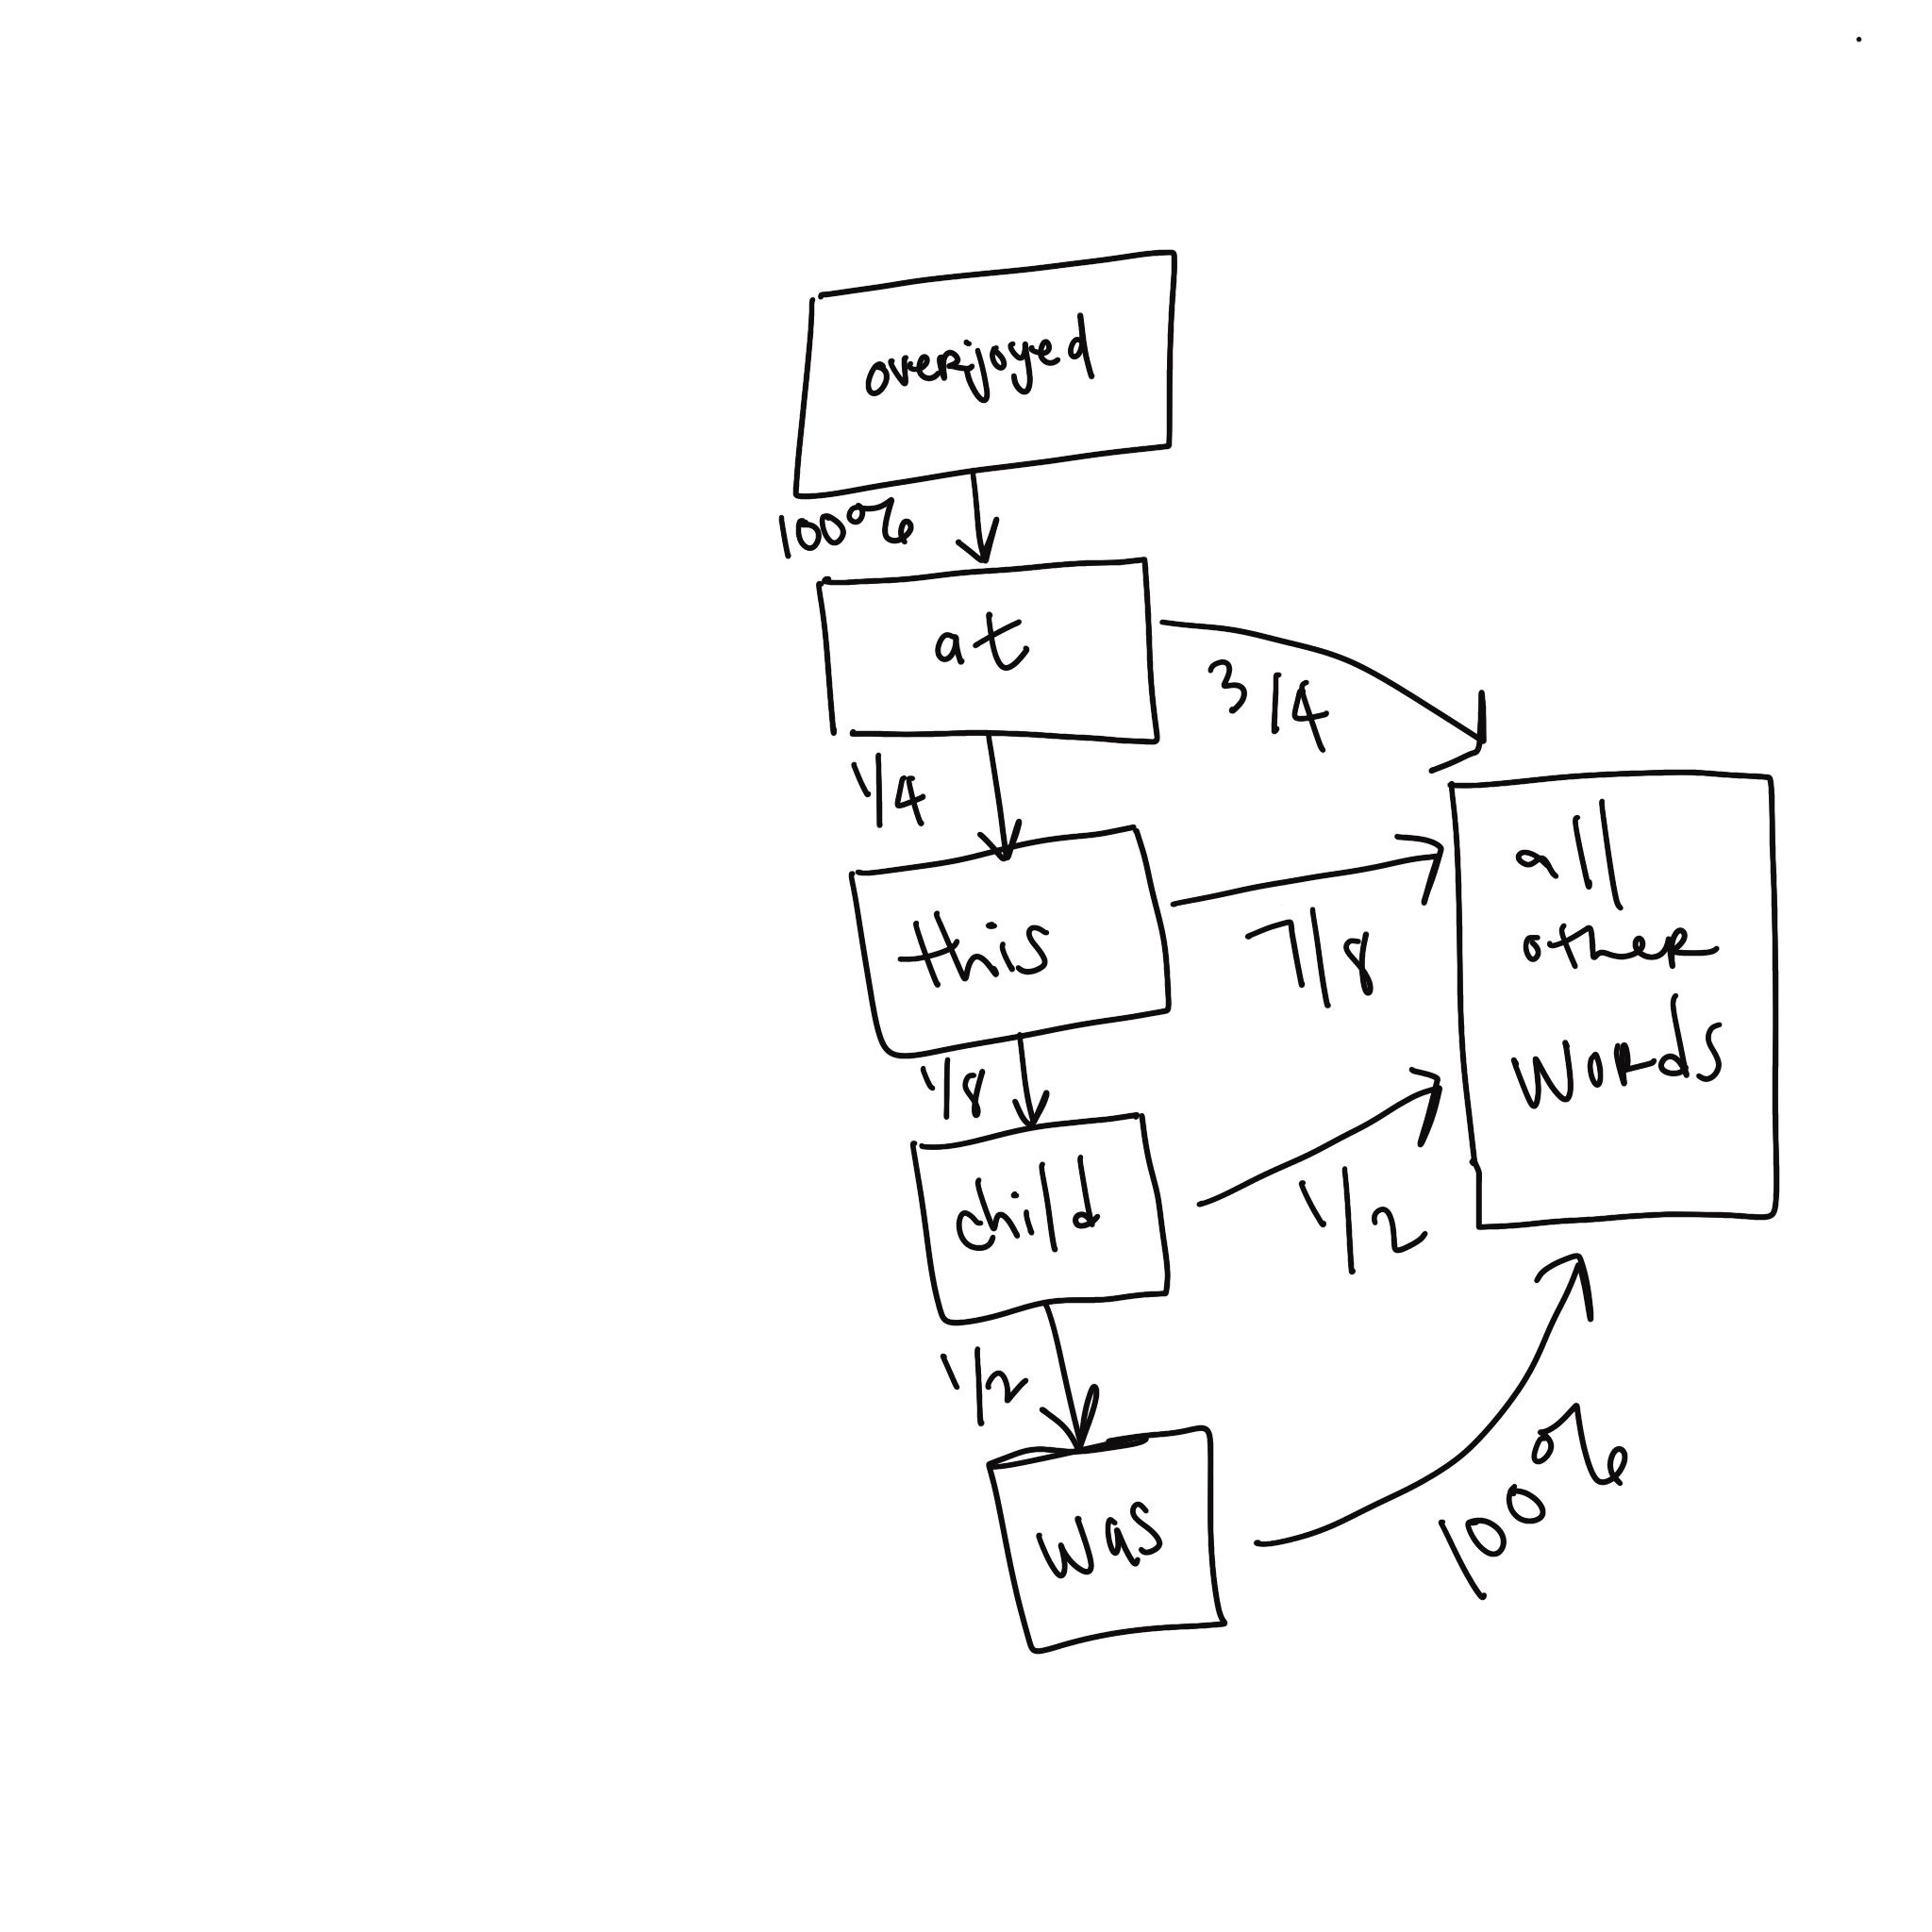

4.) even though I selected common words, they did not circulate as much as the other diagrams I showed the probability with each one. 

5.) Extra credit: Modify the code in the Markov chain predictive text notebook to generate
each word based on the previous two words, instead of the previous one word. Again
generate some lines of predictive text and share your favorites, along with your modified
code.

In [ ]:
# new list of double words
wordlistD = []
for i in range(len(wordlist) - 1):
  wordlistD.append(wordlist[i] + " " + wordlist[i+1])

# new set of doubled words
wordsetD = set(wordlistD)

# dictionary of words to idx and idx to words 
numberdictionaryD = dict()
worddictionaryD = dict() 

# mapping each word to its location
for i, word in enumerate(wordsetD):
  numberdictionaryD[word]= i
  worddictionaryD[i]= word

# counting how often each word in the text? 
frequenciesD= dict()
for i in wordsetD:
  frequenciesD[i]= dict()

for j in range(len(wordlistD)-1):
  # grab the single word from the next double
  nword = wordlistD[j+1].split(" ")[1]
  # if it is already in the dic, increment the freq
  if nword in frequenciesD[wordlistD[j]]:
    frequenciesD[wordlistD[j]][nword]+=1
  else:
    # not in the dict yet, add it and set to one
    frequenciesD[wordlistD[j]][nword]=1
# making a transition matrix at zero that is the length of the words 
transitionmatrixD =np.zeros((len(wordset),len(wordsetD)))
for i in frequenciesD: 
  ptotal = sum(frequenciesD[i].values())
  for j in frequenciesD[i]:
    # row = word, col = double word
    transitionmatrixD[numberdictionary[j]][numberdictionaryD[i]]=frequenciesD[i][j]/ptotal


In [ ]:
# looks up a word in the transition matrix and find probabilities for the next words. 
# Uses previous 2 words to determine next word
def predictDouble(word, length):
  # call old function once to get a double word
  string = predict(word, 2)
  dword = string
  # predict using double words moving on
  for i in range(0,length-2):
    # get prob from the double word trans matrix
    probability = transitionmatrixD[:, numberdictionaryD[dword]]
    # use the wordset for length because we are still predicting a single word
    nextwordindex =np.random.choice(range(0, len(wordset)), p= probability)
    # grap the next word from single word index
    nword = worddictionary[nextwordindex]
    string = string + " " + nword
    # get a new dword for next 2
    dword = dword.split(" ")[1] + " " + nword
  return(string)

In [ ]:
print(predictDouble("was", 40))

was not her child, but the daughter of a proud and unbending disposition and could not bear to live in poverty and want when Providence afforded her such powerful protection. They consulted their village priest, and the father of their



**1.)**


was one which attracted my mother prevailed on her I received as made to a possession of my parents, but this circumstance seemed to draw inexhaustible stores of affection from a very mine of love to bestow them upon me.

**2.)**


was soon explained. With his permission my mother far above all the rest. She appeared of a distinct species, a being heaven-sent, and bearing a celestial stamp in all her features. The peasant woman, perceiving that my mother had said

